In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sets the theme of the charts
plt.style.use('seaborn-darkgrid')

%matplotlib inline

In [2]:
#Loading the three datasets
charts_df = pd.read_csv('ph_spotify_daily_charts.csv')
charts_artists_df = pd.read_csv('ph_spotify_daily_charts_artists.csv')
charts_tracks_df = pd.read_csv('ph_spotify_daily_charts_tracks.csv')


## Dataset Description

This notebook will be utilizing the dataset called "Spotify Daily Top 200 Tracks in the Philippines".
It contains information about the Daily Top 200 most streamed songs on Spotify from January 1, 2017 until March 31, 2023. 

The entire dataset is seperated into three files.

The **first file** contains data about the tracks that made it to the Top 200 for a specific day. The following are descriptions of each variable in the dataset. 
- **`date`**: the exact date the track is in the Daily Top 200 Chart.
- **`position`**: the position of the track based on the number of streams. Values are limited in the range of 1 to 200.
- **`track_id`**: the unique identifier Spotify uses to identify the songs on their platform. They can be specifically used this way: "https://open.spotify.com/track/<track_id>"
- **`track_name`**: the name of the track/song
- **`artist`**: the name of the artist who made the track/song
- **`streams`**: number of times the song was played

The file was loaded in the code blocks below. It contains *456200* observations, each observation representing a track that was part of the Daily Top 200 Chart for a specific day. It means that it can contain multiple instances for the same track, given that it belongs to the Top 200 Charts for a different date.

In [3]:
charts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456201 entries, 0 to 456200
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        456201 non-null  object
 1   position    456201 non-null  int64 
 2   track_id    456201 non-null  object
 3   track_name  456191 non-null  object
 4   artist      456191 non-null  object
 5   streams     456201 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 20.9+ MB


In [4]:
#Top 5 songs for January 1st, 2017
charts_df.head(5)

,date,position,track_id,track_name,artist,streams
0,01/01/2017,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,01/01/2017,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,01/01/2017,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,01/01/2017,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,01/01/2017,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


The **second file** contains information about the artists who made the songs that reached the Daily Top 200 Charts. The following are descriptions of each variable in the dataset.
- **`artist_id`**: the unique identifier Spotify uses to identify the artists on their platform.
- **`artist_name`**: the name of the artist
- **`total_followers`**: the number of followers the artist had on the time of recording the data
- **`genres`**: an array containing the genres the artist is associated with (if any). [Source](https://developer.spotify.com/documentation/web-api/reference/get-an-artist)
- **`popularity`**: an integer between 0 being the lowest to 100 being the highest, representing the popularity of the artist calculated from all of their tracks.

The code blocks below show that there are *988* observations for this file, each observation representing a unique artist whose tracks made it into the Daily Top 200 Charts atleast once.

In [5]:
charts_artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist_id        988 non-null    object
 1   artist_name      988 non-null    object
 2   total_followers  988 non-null    int64 
 3   genres           988 non-null    object
 4   popularity       988 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 38.7+ KB


In [6]:
#First 5 artists in the dataset
charts_artists_df.head(5)

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,47387027,"['dance pop', 'pop']",89
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,11471232,"['pop', 'talent show', 'uk pop']",82
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,20036566,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",81
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,40125006,['pop'],86
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,8535540,"['dance pop', 'pop', 'post-teen pop']",73


The **third file** contains data about the speicfic details about the tracks listed in the **first file**. The following are descriptions of each variable in the dataset.
- **`track_id`**: the unique identifier Spotify uses to identify the songs on their platform. They can be specifically used this way: "https://open.spotify.com/track/<track_id>". Identical to their respective observations in the **first file**
- **`track_name`**: the name of the track/song. Identical to their respective observations in the **first file**
- **`artist_id`**: the unique identifier Spotify uses to identify the artists on their platform. Identical to their respective observations in the **second file**
- **`artist_name`**: the name of the artist. Identical to their respective observations in the **second file**
- **`album_id`**: the unique identifier Spotify uses for the album that contains the track/song (if any). [Source](https://developer.spotify.com/documentation/web-api/reference/get-an-album)
- **`duration`**: the duration of the song in milliseconds
- **`release_date`**: the date the album containing the track/song was released
- **`popularity`**: the popularity of the album represented as an integer between 0 being the lowest to 100 being the highest
- **`danceability`**: describes how suitable a song is for dancing based on musical elements present in the track specifically the tempo, rhythm stability, beat strength, and overall regularity. It has a value between 0 being the least danceable to 1 being the most danceable.
- **`energy`**: a value between 0 to 1 representing the measure of intensity and activity.
- **`key`**: a value ranging from -1 to -11 representing the key the track is in using Standard Pitch Class Notation. e.g. 0 = C, 1 = C#/Db, and so on.
- **`loudness`**: overall (average) loudness of a track in decibels. Values typically range between -60 to 0 db
- **`mode`**: a value of either 0 or 1 indicating the modality of a track, 0 represents *minor* and 1 represents *major*
- **`speechiness`**: a value representing the presence of spoken words detected in a track. It ranges between 0 to 1 where tracks that are exclusively speech-like has a value that is closer to 1.0
- **`acousticness`**: a value between 0 to 1 representing the confidence that the track is acoustic. 1.0 represents high confidence that the track is acoustic
- **`instrumentalness`**: a value between 0 to 1 representing a prediction whether the track has no vocals. The closer the value is to 1.0, the greater likelihood that it has no vocal content.
- **`liveness`**: a value between 0 to 1 representing the presence of an audience detected in the recording. A value above 0.8 provides a strong likelihood that the track is live (performed and recorded in front of an audience).
- **`valence`**: a value between 0 to 1 representing the positiveness conveyed by a track. A value closer to 1.0 represents a positive track (e.g. happy or cheerful) and a value closer to 0.0 represents a negative track (e.g. sad or depressing)
- **`tempo`**: a value representing the overall tempo (speed or pace) of a track in beats per minute (BPM). [Source](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

The code blocks below show that the file contains *4768* observations, each observation representing a unique track that was in the Daily Top 200 Charts atleast once.

In [7]:
charts_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4768 non-null   object 
 1   track_name        4763 non-null   object 
 2   artist_id         4768 non-null   object 
 3   artist_name       4763 non-null   object 
 4   album_id          4768 non-null   object 
 5   duration          4768 non-null   int64  
 6   release_date      4768 non-null   object 
 7   popularity        4768 non-null   int64  
 8   danceability      4767 non-null   float64
 9   energy            4767 non-null   float64
 10  key               4767 non-null   float64
 11  loudness          4767 non-null   float64
 12  mode              4767 non-null   float64
 13  speechiness       4767 non-null   float64
 14  acousticness      4767 non-null   float64
 15  instrumentalness  4767 non-null   float64
 16  liveness          4767 non-null   float64


In [8]:
charts_tracks_df.head(5)

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,87,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


# Data Cleaning

In order to ensure the accuracy of the observations in the datasets, they must first be cleaned.

The biggest issue this dataset has is that there are **duplicate observations** for some tracks.
This is easily observable in the dataset below (third file) where its observations are supposed to have unique values for the **track_name** variable.

In [9]:
#Get a series where each observation is a boolean which states whether its corresponding index in charts_tracks_df has a duplicate
charts_tracks_dupe_trackname = charts_tracks_df.duplicated(subset='track_name', keep=False)

#Introduce charts_tracks_dupe_trackname as a column in charts_tracks_df
charts_tracks_df['duplicate_by_name'] = charts_tracks_dupe_trackname

#Looks for a track whos potentially a duplicate and whos track name is "'Di Na Babalik"
charts_tracks_df.query("duplicate_by_name == True")[charts_tracks_df['track_name'] == "'Di Na Babalik"]

C:\Users\Luis\AppData\Local\Temp\ipykernel_23020\3459937464.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  charts_tracks_df.query("duplicate_by_name == True")[charts_tracks_df['track_name'] == "'Di Na Babalik"]


,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name
1951,5S4T2Pdr8qhetF3UhkwuMj,'Di Na Babalik,5HIZU0JzM0AgfItVOm4E08,This Band,7zJxOlHuAGpCC7ZtKHm0Rz,340262,2019-02-03,0,0.358,0.435,10.0,-7.265,1.0,0.0349,0.00819,0.000936,0.112,0.14,76.132,True
2061,7hoP5NDUXEbmOawvEAsi8h,'Di Na Babalik,5HIZU0JzM0AgfItVOm4E08,This Band,0pFRzLxgSt9QlXKuukR8A4,340262,2019-02-03,1,0.358,0.435,10.0,-7.265,1.0,0.0349,0.00819,0.000936,0.112,0.14,76.132,True


This method is effective in detecting observations with the same **track_name**. We can also see that the reason these duplicate observations were allowed to exist is because they have unique values for the **track_id** variable, which is Spotify's way for uniquely identifying tracks. This can be seen with the observations whose **track_name** values are both *'Di Na Babalik* which was also performed by the same artist and has completely identical values for the rest of the variables which allows us to conclude that these two observations are indeed duplicates. A theory as to why these duplicates exist is because although they are the exact same track, they are uploaded multiple times to Spotify for various reasons, leading Spotify to treat it as different tracks.

Although this detects observations with the same **track_name** values, there are several issues that arise from this method. A major issue that can be seen is that since it only detects duplicates by one variable, it ignores cases of duplicates where the variable has different values leading to *false negatives* in checking for duplicates. An example of one such case is shown below:

In [10]:
charts_tracks_df[charts_tracks_df['track_name'].str.contains('DALLA DALLA') == True]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name
1952,6G7DuXoSGeAf6BZivJdEjF,달라달라 DALLA DALLA,2KC9Qb60EaY0kW4eH68vr3,ITZY,2gHd5bCrj42s8nwwXBALd4,199873,2019-02-13,0,0.79,0.853,11.0,-4.564,0.0,0.0666,0.00116,0.000042,0.329,0.713,125.000,False
1976,0GU5GuJQQEnnREO2FxnVPT,달라달라 (DALLA DALLA),2KC9Qb60EaY0kW4eH68vr3,ITZY,0fUJLlrsG1MpTHr3MxPN9C,199873,2019-02-12,0,0.79,0.853,11.0,-4.564,0.0,0.0665,0.00116,0.000042,0.329,0.713,124.998,False


It also presents an issue where observations with the same **track_name** values are detected but they should not be considered duplicates. An example is shown below:

In [11]:
charts_tracks_df[charts_tracks_df['track_name'] == '\'Di Na Muli']

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name
1360,3VQb0rq27GPX92X53Ni1Lc,'Di Na Muli,09Xydf4dlkr29dH99DmsvQ,Janine Teñoso,1hwjIPHrnNBFuxWBWRHmge,207018,2018-04-06,0,0.413,0.561,1.0,-3.092,1.0,0.0517,0.192,0.0,0.0914,0.352,88.690,True
1376,0eKQS9aRwCW2J5q6uDKX7S,'Di Na Muli,5cYJYBMg1n71v7cvthr1SO,The Itchyworms,3sBZBmTeB7QMWL4by9ybWm,260599,2018-05-15,0,0.517,0.468,4.0,-6.582,1.0,0.0345,0.702,0.0,0.1520,0.266,121.284,True
1389,0rkML0CSX3wteVwUh5cspv,'Di Na Muli,5cYJYBMg1n71v7cvthr1SO,The Itchyworms,3GX88wDTaudQN9oK5j4kf1,260599,2018-06-04,0,0.517,0.468,4.0,-6.582,1.0,0.0345,0.702,0.0,0.1520,0.266,121.284,True
2063,6p6DiqAPwMX7vdrSo30wgo,'Di Na Muli,09Xydf4dlkr29dH99DmsvQ,Janine Teñoso,4u7nLwDVRz7z0mxweMbVZ6,207018,2018-04-06,0,0.413,0.561,1.0,-3.092,1.0,0.0517,0.192,0.0,0.0914,0.352,88.690,True


As we can see, the first example shows that they are not considered as duplicates as seen where their **duplicate_by_name** variable is flagged as *False*. The second example then shows four observations with all equal titles but as observed, only two of the four observations that are flagged as **duplicates** are actually duplicates and the rest are *false positives*.

To address these inconsistencies present in the dataset, a new method to clean the dataset is required. From observing similarities in values between the duplicates, it is apparent that the **duration** and **artist_name** values of the tracks are identical. This makes sense, seeing that the a duplicate track has to be uploaded by the same artist and it would have the same duration given that it was just uploaded twice. 

An implementation of this can be seen below:

In [12]:
charts_tracks_dupe_artistname_duration = charts_tracks_df.duplicated(subset=['duration','artist_name'], keep=False)

charts_tracks_df['duplicate_by_artistname_duration'] = charts_tracks_dupe_artistname_duration
possible_duplicates_df = charts_tracks_df.query("duplicate_by_artistname_duration == True").sort_values(by=['artist_name', 'duration'], inplace=False)


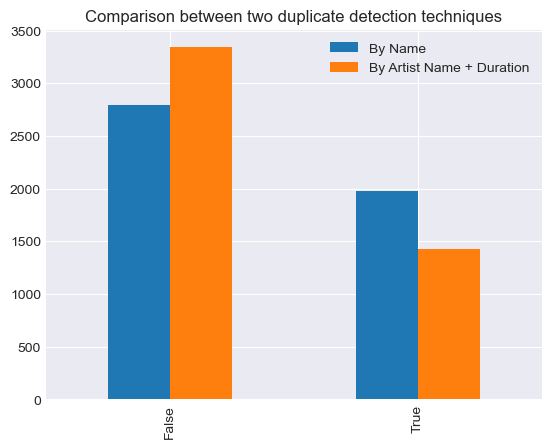

In [13]:
duplicate_by_name_counts = charts_tracks_df["duplicate_by_name"].value_counts()
duplicate_by_artistname_duration_counts = charts_tracks_df["duplicate_by_artistname_duration"].value_counts()
duplicate_comparison_df = pd.DataFrame({"By Name": duplicate_by_name_counts, "By Artist Name + Duration": duplicate_by_artistname_duration_counts})

duplicate_bar_plot = duplicate_comparison_df.plot.bar(title = "Comparison between two duplicate detection techniques")
plt.show()

As we can see, changing the condition lead to better results wherein less observations are flagged as duplicates, thereby reducing *false positives* when detecting duplicates. It is not a 100% guarantee that all the *positive* observations are truly duplicates so at this point, there is no choice but to examine every observation that are considered as a duplicate.

This also addresses the first problem of *false negatives* discussed earlier since it is now dependent on more accurate variables that would ensure that two observations are truly duplicates.

In [14]:
charts_tracks_df[charts_tracks_df['track_name'].str.contains('DALLA DALLA') == True]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name,duplicate_by_artistname_duration
1952,6G7DuXoSGeAf6BZivJdEjF,달라달라 DALLA DALLA,2KC9Qb60EaY0kW4eH68vr3,ITZY,2gHd5bCrj42s8nwwXBALd4,199873,2019-02-13,0,0.79,0.853,...,-4.564,0.0,0.0666,0.00116,0.000042,0.329,0.713,125.000,False,True
1976,0GU5GuJQQEnnREO2FxnVPT,달라달라 (DALLA DALLA),2KC9Qb60EaY0kW4eH68vr3,ITZY,0fUJLlrsG1MpTHr3MxPN9C,199873,2019-02-12,0,0.79,0.853,...,-4.564,0.0,0.0665,0.00116,0.000042,0.329,0.713,124.998,False,True


Now we can easily scan the dataset in order to double check and handle the duplicates. Luckily, this also includes observations that have empty **track_name** and **artist_name** variables which we could assume are deleted songs and should be excluded in the datasets.

After examining the dataset, we can now remove the *false positives* that remained.  

In [15]:
false_positive_ids = ['27OeeYzk6klgBh83TSvGMA', '1EHUQesfVKwbthtNcpBi9g', '4HBvwhhYo7YiYXkUDrOHzS', '2UYG331lOP6amEWplE7eno', '5EzitieoPnjyKHAq0gfRMa', '01QhKtUc12FGw2wX7dMYvv', '59c0HrzmHfyQs6LgDw5cHe',
                      '0VwNdo84DaVYLIkbVO86ND', '7AWtaOSb7cgi16wJr3mkuf', '3AyLh4R4D3fQfyqCsTdFf3', '514mQDPkXmPzsYwGNmkBJZ', '1QCqedB1ibmRO9x7Ikb5LI', '4VYEnxm7lmtG5sEEbcmORB', '3h34cQPPddk4x9cluPIAvv',
                      '2CWnuF7ht55Ajyeg4WPvWu', '3i9UVldZOE0aD0JnyfAZZ0', '6KUE0HSSudAp9AOycaF6SH', '314ZkcV7oLWG8yWE7LABvH', '3FeVmId7tL5YN8B7R3imoM', '2sp32rIevQhpbo0Z4aQzoe', '42CeaId2XNlxugDvyqHfDf',
                      '7CZyCXKG6d5ALeq41sLzbw', '3OaBCFROgrLRbZGCFP6E3M', '6ce41JVa6KFaryfmC2bu2W', '7oDd86yk8itslrA9HRP2ki', '57Enap29zKl7NGRdDJjkjA', '6g1NlCpW7fgqDnWbCCDrHl', '0nrRP2bk19rLc0orkWPQk2']

#remove all the observations in the false_positive_ids from the dataset
possible_duplicates_df = possible_duplicates_df[~possible_duplicates_df['track_id'].isin(false_positive_ids)]

Now instead of using the contents of **possible_duplicates_df** to clean up the **charts_tracks_df** DataFrame, we first need it to use it to clean **charts_df**. This is because the **charts_df** DataFrame also contains the duplicate observations that were presented. 

The plan is to first set up a lookup table wherein duplicate observations would be replaced by one observation that represents that specific group of duplicates, essentially grouping the duplicates into one main observation.

In [16]:
original_artist_name = None
original_duration = None
original_track_name = None
original_track_id = None

result_list = []
for idx, row in possible_duplicates_df.iterrows():
    curr_artist_name = row['artist_name']
    curr_duration = row['duration']
    curr_track_name = row['track_name']
    curr_track_id = row['track_id']

    if ((original_artist_name != curr_artist_name) or (original_duration != curr_duration)):
        original_artist_name = curr_artist_name
        original_duration = curr_duration
        original_track_name = curr_track_name
        original_track_id = curr_track_id
    else:
        result = {'original_track_id': original_track_id, 'original_track_name': original_track_name, 'duplicate_track_id': curr_track_id, 'duplicate_track_name': curr_track_name}
        result_list.append(result)
lookup_duplicate_df = pd.DataFrame(result_list)
    

After observing the rows in the newly constructed DataFrame, there are still some inconsistencies with the groupings wherein some groupings should be subdivided into smaller groups, such is the case of the observation seen below:

In [17]:
lookup_duplicate_df[lookup_duplicate_df['original_track_name'] == 'SET ME FREE']

,original_track_id,original_track_name,duplicate_track_id,duplicate_track_name
583,4OtVQ2ZxS7yigIjGz5yKg1,SET ME FREE,6bkTxw6m6vl8Oc3xtKBXN0,SET ME FREE (ENG)
584,4OtVQ2ZxS7yigIjGz5yKg1,SET ME FREE,1Zr1SoGePJ3iKKakmmZaMR,SET ME FREE
585,4OtVQ2ZxS7yigIjGz5yKg1,SET ME FREE,63zZufrRDgwcVMUbvbfcJh,SET ME FREE - ENG


The grouping above is an example of the inconsistency wherein it should be seperated into two groups to accomodate for the duplicate tracks that is the English Version. There are other cases that result in this inconsistency, such as an instrumental version of the duplicate being grouped with one with vocals. Below, these inconsistencies are addressed:

In [21]:
inconsistent_groupings = [
        [
            {'track_id': '3omvXShuRPM3zbDpWYqf5g', 'track_name': 'MORE & MORE'},
            {'track_id': '2bAAj29XGc4h1G4oEGYCmg', 'track_name': 'MORE & MORE'}
        ],
        [
            {'track_id': '03wvlNaxFKB9sge4U6vyPE', 'track_name': 'MORE & MORE (English Version)'},
            {'track_id': '0E3LHQbZTPLyw06z6XvmNn', 'track_name': 'MORE & MORE - English Ver.'}
        ],
        [
            {'track_id': '0gptQQwXDtDYkkgoQl1V9T', 'track_name': 'Permission to Dance (Instrumental)'},
            {'track_id': '0h1bCFiGHWBB1Wq61W0wZj', 'track_name': 'Permission to Dance (Instrumental)'}   
        ],
        [
            {'track_id': '3XYRV7ZSHqIRDG87DKTtry', 'track_name': 'Permission to Dance'},   
            {'track_id': '5eXBXreN3d1zdj6Sa8dS0u', 'track_name': 'Permission to Dance'},   
            {'track_id': '0LThjFY2iTtNdd4wviwVV2', 'track_name': 'Permission to Dance'}   
        ],
        [
            {'track_id': '1Zr1SoGePJ3iKKakmmZaMR', 'track_name': 'SET ME FREE'},   
            {'track_id': '4OtVQ2ZxS7yigIjGz5yKg1', 'track_name': 'SET ME FREE'}
        ],
        [
            {'track_id': '63zZufrRDgwcVMUbvbfcJh', 'track_name': 'SET ME FREE - ENG'},   
            {'track_id': '6bkTxw6m6vl8Oc3xtKBXN0', 'track_name': 'SET ME FREE (ENG)'}
        ]
    ]

#Drop the existing observations first
for grouping in inconsistent_groupings:
    for indiv_entries in grouping:
        #returns a Int64Index([index, index, index], dtype='int64')
        idx = lookup_duplicate_df[lookup_duplicate_df['original_track_id'] == indiv_entries['track_id']].index
        if (idx.size > 0):
            lookup_duplicate_df.drop(idx, inplace=True)


#Adding the groupings into lookup_duplicate_df as intended
original_track_name = None
original_track_id = None
result_list = []
for grouping in inconsistent_groupings:
        for i in range(len(grouping)):
            if (i == 0):
                original_track_name = grouping[i]['track_name']
                original_track_id = grouping[i]['track_id']
            else:
                result = {'original_track_id': original_track_id, 'original_track_name': original_track_name, 'duplicate_track_id': grouping[i]['track_name'], 'duplicate_track_name': grouping[i]['track_id']}
                result_list.append(result)

temp_df = pd.DataFrame(result_list)
lookup_duplicate_df = pd.concat([lookup_duplicate_df, temp_df], ignore_index=True)
lookup_duplicate_df.tail(10)


,original_track_id,original_track_name,duplicate_track_id,duplicate_track_name
740,33a5I5tDvZoI3iIucwrho5,lutang,6jB7cmxRuvf5QUxYl73q0o,lutang
741,1Ry0l6trESL8T4ddsRaYLE,An Art Gallery Could Never Be As Unique As You,22Nd3GuO7sHopPjdKccRcq,An Art Gallery Could Never Be As Unique As You
742,3sJKnpDvliJ9OH4cORjatB,Ligaya,4IeuTj1pEHuL9vJSiEqEfR,Ligaya
743,3omvXShuRPM3zbDpWYqf5g,MORE & MORE,MORE & MORE,2bAAj29XGc4h1G4oEGYCmg
744,03wvlNaxFKB9sge4U6vyPE,MORE & MORE (English Version),MORE & MORE - English Ver.,0E3LHQbZTPLyw06z6XvmNn
745,0gptQQwXDtDYkkgoQl1V9T,Permission to Dance (Instrumental),Permission to Dance (Instrumental),0h1bCFiGHWBB1Wq61W0wZj
746,3XYRV7ZSHqIRDG87DKTtry,Permission to Dance,Permission to Dance,5eXBXreN3d1zdj6Sa8dS0u
747,3XYRV7ZSHqIRDG87DKTtry,Permission to Dance,Permission to Dance,0LThjFY2iTtNdd4wviwVV2
748,1Zr1SoGePJ3iKKakmmZaMR,SET ME FREE,SET ME FREE,4OtVQ2ZxS7yigIjGz5yKg1
749,63zZufrRDgwcVMUbvbfcJh,SET ME FREE - ENG,SET ME FREE (ENG),6bkTxw6m6vl8Oc3xtKBXN0


Now that the groupings are consistent, we can now use it to clean up the dataset in **charts_df**. The plan is to replace the **track_id** and **track_name** variables of the dataset when it is flagged as a duplicate using **lookup_duplicate_df** with the **original_track_id** and **original_track_name** values of its corresponding observation. However, there is a problem that needs to be addressed where more than one instance of the duplicates can appear in the dataset for a specific day, as seen with the example below where observations that have the same track_name and artist are seen with the same date:

In [24]:
#main_chart_dupe = charts_df.duplicated(subset=['date', 'track_name', 'artist'], keep=False)
charts_df[charts_df.duplicated(subset=['date', 'track_name', 'artist'], keep=False)]


,date,position,track_id,track_name,artist,streams
39406,20/07/2017,7,3RXkboS74UYzN14xTqzPyY,NaN,NaN,121541
39423,20/07/2017,24,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,85374
39426,20/07/2017,27,4JAyIDXOqNM6qHuZML01uX,NaN,NaN,81223
39455,20/07/2017,56,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,46754
39606,21/07/2017,7,3RXkboS74UYzN14xTqzPyY,NaN,NaN,120186
...,...,...,...,...,...,...
400780,01/07/2022,181,2PTzfXh5Ut3hjRrWGyafz6,Passenger Seat,Stephen Speaks,37165
401791,06/07/2022,192,2PTzfXh5Ut3hjRrWGyafz6,Passenger Seat,Stephen Speaks,37170
401796,06/07/2022,197,5ZpSUdy5wL5Hvwsqz6JCAt,Passenger Seat,Stephen Speaks,36591
401985,07/07/2022,186,5ZpSUdy5wL5Hvwsqz6JCAt,Passenger Seat,Stephen Speaks,38050


To handle this problem, a solution would be to first replace the duplicate observations with their original counterparts using the lookup table we generated and afterwards, if multiple observations of the original was detected in the same day, we would need to drop the other observations except for one and add the **streams** of the dropped observations to the one that remains and we could also remove the empty obersvations too in the process. After everything is done, we would need to re-calibrate the charts so that the position of the track correctly corresponds to their new stream count.

In [132]:
charts_df.head(5)

,date,position,track_id,track_name,artist,streams
0,01/01/2017,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,01/01/2017,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,01/01/2017,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,01/01/2017,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,01/01/2017,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [47]:
pd.set_option('display.max_rows', None)
charts_tracks_df.query('duplicate_by_artistname_duration == True').sort_values(by = ['duration', 'artist_name'])



,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name,duplicate_by_artistname_duration
645,3RXkboS74UYzN14xTqzPyY,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,4yQC726OERjevM2YKtORnm,0,0000,0,0.543,0.6610,...,-5.855,0.0,0.0538,0.214000,0.000000,0.2410,0.5560,144.967,True,True
646,3eFJqPe8VUYrABbFjSauuj,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,6zP4EpOz9M0vhrjp7FNwKN,0,0000,0,0.948,0.4050,...,-6.516,1.0,0.0795,0.191000,0.000000,0.0804,0.7280,121.021,True,True
647,4JAyIDXOqNM6qHuZML01uX,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,6zP4EpOz9M0vhrjp7FNwKN,0,0000,0,0.699,0.6140,...,-4.570,1.0,0.0521,0.015200,0.000005,0.0734,0.2750,122.990,True,True
648,3bVbQvGVIe4n24AzyXovXh,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,6zP4EpOz9M0vhrjp7FNwKN,0,0000,0,0.644,0.5310,...,-6.591,1.0,0.0673,0.105000,0.000000,0.0838,0.5240,100.028,True,True
683,6Br5mChPdgQNmLF0G0gjPH,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,3jd8KzVKriW0uzSsIwxfZM,0,0000,0,0.727,0.4260,...,-9.225,1.0,0.0574,0.066700,0.000021,0.2670,0.0768,117.956,True,True
2016,53CJANUxooaqGOtdsBTh7O,Old Town Road,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,63nQw5QNKBUAh4bvqSz3rJ,113013,2019-03-14,22,0.908,0.5170,...,-6.063,1.0,0.1290,0.036100,0.000002,0.0949,0.4710,136.019,True,True
2166,2RegUmAI4EGqpXXx95rBMB,Old Town Road,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,3J0nEHIZoQW1tA2Pabgjoz,113013,2019-06-21,1,0.906,0.5200,...,-6.114,1.0,0.1310,0.046100,0.000002,0.0985,0.5160,136.000,True,True
2162,6fTt0CH2t0mdeB2N9XFG5r,Panini,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,4IRiXE5NROxknUSAUSjMoO,114893,2019-06-21,62,0.703,0.5940,...,-6.146,0.0,0.0752,0.342000,0.000000,0.1230,0.4750,153.848,True,True
2165,2pmhboG1a2XfDiTvMwO8sd,Panini,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,3J0nEHIZoQW1tA2Pabgjoz,114893,2019-06-21,1,0.703,0.5940,...,-6.146,0.0,0.0752,0.342000,0.000000,0.1230,0.4750,153.848,True,True
2304,1000nHvUdawXuUHgBod4Wv,Panini,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,71BrrQxz8mZAneNSDE9Lov,114893,2019-09-13,71,0.703,0.5940,...,-6.146,0.0,0.0752,0.342000,0.000000,0.1230,0.4750,153.848,True,True


# THIS SECTION BELOW IS FOR TESTING

In [9]:
pd.set_option('display.max_rows', None)
charts_df["track_name"].value_counts().sort_index()

'Di Lahat                                                                                                               35
'Di Na Babalik                                                                                                         386
'Di Na Muli                                                                                                            782
'bout you                                                                                                                4
(Everything I Do) I Do It For You                                                                                        1
(Not) The One                                                                                                           35
(what i wish just one person would say to me)                                                                            7
...Ready For It?                                                                                                       124
00:00 (Zero O’Cl

![Alt text](image.png)

![Alt text](image-1.png)

![Alt text](image-9.png)

IGNORE FIRST ONE
![Alt text](image-10.png)

![Alt text](image-13.png)

What is Love 

What is Love? 

The Way I Are (Dance with Somebody) (feat. Lil Wayne) - Spotify Version

The Way I Are (Dance with Somebody) [feat. Lil Wayne]  

Tag-Ulan - From "Luck At First Sight"  

Tag-ulan (Original Soundtrack of "Luck At First Sight")    

In the table below, we identified the possible duplicates by checking for songs that have similar durations.

Poossible way to clean:
1. Since everything in the table is a duplicate, we can just use that as reference
2. Make a lookup table where the duplicate track id leads back to the existing track id
3. for charts_tracks_df, we can just remove said tracks.
4. for charts_df, we need to divide the dataframe into days.
5. if a current track is in the duplicates table (refer below), 
    5.1. if the original_id is already in the list for that day, add the streams to the original and delete the observation
    5.2. if the original_id is not in the list, replace id with original and if another duplicate is found, perform 5.1
6. When all is done, reorganize the position per day with their respective positions

In [14]:
pd.set_option('display.max_rows', 50)
#keep = False means that all observations that has duplicates are kept (if left at default, the first or last instance is not included i forgot which one lmao)
dupes = charts_tracks_df.duplicated(subset='duration', keep=False)

charts_tracks_df['potential_duplicate'] = dupes
dupe_df = charts_tracks_df.query('potential_duplicate == True').sort_values(by='duration')
#dupe_df.value_counts("track_name").sort_index()
dupe_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,potential_duplicate
647,4JAyIDXOqNM6qHuZML01uX,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,6zP4EpOz9M0vhrjp7FNwKN,0,0000,0,0.699,0.614,2.0,-4.570,1.0,0.0521,0.0152,0.000005,0.0734,0.2750,122.990,True
645,3RXkboS74UYzN14xTqzPyY,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,4yQC726OERjevM2YKtORnm,0,0000,0,0.543,0.661,8.0,-5.855,0.0,0.0538,0.2140,0.000000,0.2410,0.5560,144.967,True
648,3bVbQvGVIe4n24AzyXovXh,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,6zP4EpOz9M0vhrjp7FNwKN,0,0000,0,0.644,0.531,0.0,-6.591,1.0,0.0673,0.1050,0.000000,0.0838,0.5240,100.028,True
683,6Br5mChPdgQNmLF0G0gjPH,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,3jd8KzVKriW0uzSsIwxfZM,0,0000,0,0.727,0.426,0.0,-9.225,1.0,0.0574,0.0667,0.000021,0.2670,0.0768,117.956,True
646,3eFJqPe8VUYrABbFjSauuj,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,6zP4EpOz9M0vhrjp7FNwKN,0,0000,0,0.948,0.405,1.0,-6.516,1.0,0.0795,0.1910,0.000000,0.0804,0.7280,121.021,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,3u9tIlAnygQGNJ5VuSvTfi,Bagay Tayo,0WleeEe3UurwlNbDGhb5Yz,ALLMO$T,7EyFdHaGHh73lOZz1zuFTe,397033,2018-12-04,0,0.804,0.557,0.0,-8.658,1.0,0.1630,0.3220,0.000000,0.1060,0.6450,100.053,True
3039,1OrPpim6Gl4rmRrHlyUjCn,Ulap,7dFzqx2qyelGPiBKmdSEOT,Rob Deniel,3pDZhi35k1EzRx4zzwVaVY,405738,2020-09-13,0,0.655,0.385,1.0,-8.967,0.0,0.0355,0.3980,0.005640,0.1120,0.4290,120.016,True
3069,0en1kxNAvVQxLpbteRTG7L,Ulap,7dFzqx2qyelGPiBKmdSEOT,Rob Deniel,6ciETtX9ufaXBFRClmnnNG,405738,2020-09-13,0,0.655,0.385,1.0,-8.967,0.0,0.0355,0.3980,0.005640,0.1120,0.4290,120.016,True
2192,1TU0pwihuwk0RkgwHtuy71,Walwal,2OYCiru0FZMaAXWn6eL7MA,VVS Collective,6avqibTJ5BdrlGit74uaD9,414647,2019-06-06,0,0.677,0.542,5.0,-9.246,0.0,0.0421,0.0771,0.000005,0.1180,0.3840,160.031,True


In [15]:
#tracks that MIGHT have the same track names present in the same chart for a specific date
main_chart_dupe = charts_df.duplicated(subset=['date', 'track_name', 'artist'], keep=False)
charts_df['main_chart_dupe'] = main_chart_dupe
main_chart_dupe_df = charts_df.query('main_chart_dupe == True').sort_values(by='date')
main_chart_dupe_df

,date,position,track_id,track_name,artist,streams,main_chart_dupe
163474,01/04/2019,75,0GHwNr0lqf8jpc9wesmnHo,Ex,Callalily,42514,True
163586,01/04/2019,187,7bkAr4WNoTuSjpuh1NRQjm,Ex,Callalily,23932,True
169487,01/05/2019,88,0GHwNr0lqf8jpc9wesmnHo,Ex,Callalily,34828,True
169460,01/05/2019,61,7bkAr4WNoTuSjpuh1NRQjm,Ex,Callalily,46017,True
175655,01/06/2019,56,7bkAr4WNoTuSjpuh1NRQjm,Ex,Callalily,51082,True
...,...,...,...,...,...,...,...
175510,31/05/2019,111,0GHwNr0lqf8jpc9wesmnHo,Ex,Callalily,33137,True
187791,31/07/2019,192,7bkAr4WNoTuSjpuh1NRQjm,Ex,Callalily,25682,True
187727,31/07/2019,128,0GHwNr0lqf8jpc9wesmnHo,Ex,Callalily,33632,True
120827,31/08/2018,28,03iCbZaM4OkRR4We6wIzvx,IDOL,BTS,67250,True


# Exploratory Data Analysis

After performing data cleaning on the necessary variables needed, 4 prepared EDA questions can now be answered using the provided dataset.

## Question 1:

## Question 2:

## Question 3:

## Question 4:

# Research Question